## **演示0505：使用scipy.optimize包求解函数的极值**

### **案例1：计算函数$f(x)=x^2+x$和$f(x)=x^3$的极小值**
> 对于单变量函数的极值，可直接使用*scipy.optimize.minimize_scalar*方法求解

In [1]:
''' 使用minimize_scalar方法求函数极小值 '''

import numpy as np
from scipy.optimize import minimize_scalar

def f1(x):
    return x*x+x

def f2(x):
    return x*x*x

res = minimize_scalar(f1)
print("函数【f=x*x+x】极值点：", res.x, "最小值：", res.fun)

res = minimize_scalar(f2)
print("函数【f=x*x*x】极值点：", res.x, "最小值：", res.fun) # 事实上该函数并没有收敛

函数【f=x*x+x】极值点： -0.5 最小值： -0.25
函数【f=x*x*x】极值点： -1.0737622077212198e+103 最小值： -inf


c:\users\iahuo\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: overflow encountered in double_scalars
  # Remove the CWD from sys.path while we load stuff.


### **案例2：计算函数$f(x)=100-x^2$的极大值**
>求最大值时，一般转换为求其相反值得最小值

In [2]:
''' 使用minimize_scalar方法求函数极大值 '''

import numpy as np
from scipy.optimize import minimize_scalar

def f1(x, sign):
    return sign*(100 - x*x)

res = minimize_scalar(f1, args=(-1))
print("函数极值点：", res.x, "最大值：", res.fun)

函数极值点： -4.849742195555412e-08 最大值： -100.0


### **案例3：计算函数$f(x)=x^3$在区间[3, 5]上的极小值**
>*bounds*参数可以指定自变量的区间范围

In [3]:
''' 使用minimize_scalar方法求函数在某个区间上的极值 '''

import numpy as np
from scipy.optimize import minimize_scalar

def f1(x):
    return x*x*x

res = minimize_scalar(f1, bounds=(3.0, 5.0), method='bounded')
print("函数极值点：", res.x, "最小值：", res.fun)

函数极值点： 3.0000039901987505 最小值： 27.000107735509562


### **案例4：多元函数在区间上的极值**
> 计算函数$f(x_1, x_2)=3 x_1^2 + 5 x_1 x_2 + 2 x_2^2 - 8 x_1 - 10 x_2 + 6$在$x_1 \in [0, +\infty)$和$x_2 \in [0, +\infty)$区间上的极小值  
* 如果是多变量函数，则必须使用*minimize*方法
* 在定义目标函数时，传入的第一个参数$x$是一个向量，分别代表了每个变量
* 必须要给定初始值
* 在指定*bounds*时，必须以*tuple*的形式依次描述每个变量的值域。对于$+\infty$和$−\infty$，可以使用None来代替，取决于它与区间另一端的位置关系
* 要设定*bounds*，求解器必须是'L-BFGS-B'、'TNC'或者'SLSQP'。若未指定求解器，*minimize*方法会自动选择合适得求解器

In [1]:
''' 使用minimize计算多元函数在指定区间上的极值 '''

import numpy as np
from scipy.optimize import minimize

# f(x1, x2) = 3*x1*x1 + 5*x1*x2 + 2*x2*x2 - 8*x1 - 10*x2 + 6
def f1(x):
    return 3*x[0]*x[0] + 5*x[0]*x[1] + 2*x[1]*x[1] - 8*x[0] - 10*x[1] + 6

init_x = [1.5, 0.5]
bnds = ((0, None), (0, None))
res = minimize(f1, init_x, bounds=bnds, options={'disp':True})
print("函数极值点：", res.x, "最小值：", res.fun)

函数极值点： [0.         2.50000012] 最小值： -6.499999999999972


### **案例5：多元函数带约束条件的极值**
>计算函数$f(x_1, x_2, x_3)=2 x_1^2 + 3 x_2^2 + 7 x_3^2$在约束条件：$ 2 x_1 + x_2 = 1$ 和$2 x_2 + x_3 = 1$下的极值  
* constraints参数可以指定约束条件
* 对于"="约束条件，设定type为'eq'，并给出令$h(x) = 0$的约束表达式
* 对于"$\leq$"约束条件，设定type为'ineq'，并给出令$h(x) \leq 0$的约束表达式。不存在">"条件约束，在这种情况下，要设法转为"$\leq$"约束
* 如果使用约束条件，那么求解器必须是'COBYLA'或'SLSQP'

In [5]:
''' 使用minimize计算多元函数在多个约束条件下的极值 '''

import numpy as np
from scipy.optimize import minimize
def target(x):
    return 2*x[0]*x[0] + 3*x[1]*x[1] + 7*x[2]*x[2]

cons = (
{'type':'eq', 'fun':lambda x: np.array([2*x[0]+x[1]-1])},
{'type':'eq', 'fun':lambda x: np.array([2*x[1]+3*x[2]-2])})

init_x = [0.1,0.2,0.5] # 假定的初始最优值
res = minimize(target, init_x, method='SLSQP', constraints=cons)
print(res)

     fun: 1.6386554640302917
     jac: array([0.90752964, 3.27741121, 4.23513828])
 message: 'Optimization terminated successfully.'
    nfev: 22
     nit: 4
    njev: 4
  status: 0
 success: True
       x: array([0.2268824 , 0.54623519, 0.30250987])


### **案例6：使用minimize求解拟合公式的最优系数向量**
> minimize方法可以用来对多元函数拟合的权重参数的求解

[ 2.98829862 -5.00357605  2.00808206 -7.99727562 -9.97410052  6.49867435]


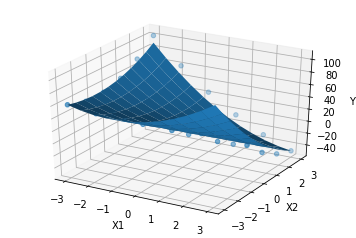

In [6]:
''' 使用scipy的minimize方法进行多元高阶拟合 '''

import numpy as np
import scipy.optimize as opt
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline

def f(x1, x2):
    # np.random.random()是为了给样本数据一个小的扰动
    return 3 * x1 * x1 - 5 * x1 * x2 + 2 * x2 * x2 - 8 * x1 - 10 * x2 + 6 + np.random.random()

# 此处的X_ext必须是已经形成x1*x1, x1*x2，x2*x2,x1,x2,1共6列的数据矩阵
def fit_function(W, X_ext):
    return np.dot(X_ext, W)

# 最小化目标函数。残差的平方和除以2m
def target_function(W, X_ext, y):
    temp = fit_function(W, X_ext) - y
    return temp.dot(temp) / (2 * len(X_ext))

# 下列函数利用拟合出来的W参数对新的X1和X2数据进行计算
def predict_function(W, X1, X2):
    return W[0] * X1 * X1 + W[1] * X1 * X2 + W[2] * X2 * X2 + W[3] * X1 + W[4] * X2 + W[5]

x1 = np.linspace(-3, 3, 6)
x2 = np.linspace(-3, 3, 6)

POLY_COUNT = 6                      # 2阶多项式一共6项
def map_data(X1, X2):           # 生成两个变量的高阶矩阵
    variables = np.ones((len(X1) * len(X2), POLY_COUNT))
    y = np.zeros((len(X1)*len(X2)))
    row_index = 0
    for i in np.arange(len(X1)):
        for j in np.arange(len(X2)):
            row = variables[row_index]
            row[0] = X1[i] * X1[i]
            row[1] = X1[i] * X2[j]
            row[2] = X2[j] * X2[j]
            row[3] = X1[i]
            row[4] = X2[j]
            y[row_index] = f(X1[i], X2[j])
            #row[5] = 1
            row_index += 1
    return (variables, y)

w_init = np.random.randn(POLY_COUNT)
x_ext, y = map_data(x1, x2)
result = opt.minimize(target_function, w_init, args=(x_ext, y))
w = result.x
print(w)                # 拟合参数应接近：[  3.  -5.   2.  -8. -10.   6.]


ax = plt.figure().add_subplot(111, projection = '3d')  
x_grid = np.meshgrid(x1, x2)
ax.scatter(x_grid[0], x_grid[1], y)                             # 绘制散点

# 使用拟合函数计算曲面上的点阵
x1_fit = np.linspace(-3, 3, 12)
x2_fit = np.linspace(-3, 3, 12)
x_fit_grid = np.meshgrid(x1_fit, x2_fit)
y_fit = predict_function(w, x_fit_grid[0], x_fit_grid[1])
ax.plot_surface(x_fit_grid[0], x_fit_grid[1], y_fit)            # 绘制曲面

ax.set_xlabel('X1')  
ax.set_ylabel('X2')  
ax.set_zlabel('Y')
plt.show()